In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sc
import numpy as np

n = ['folder', 'angle', 'height', 'counts', 'time']
data = pd.read_csv('counts_angle.csv', skiprows = 1, header = 0, names = n)
data = data.sort_values(by = ['angle']).reset_index()
data['norm_count'] = data['counts']/data['time']

dat_angels = data['angle'].values
dat_counts = data['norm_count'].values
N_points = len(dat_counts)

data

,index,folder,angle,height,counts,time,norm_count
0,0,output_2021-06-23_14-03,0.0000,0,23,342.329000,0.067187
1,6,pass,0.0000,0,3000,47357.704417,0.063348
2,4,output_2021-06-23_17-21,0.1113,40,170,2811.000000,0.060477
3,1,output_2021-06-23_15-04,0.2630,93,122,1911.693734,0.063818
4,2,output_2021-06-23_15-38,0.5397,185,141,2874.710000,0.049048
5,5,output_2021-06-23_18-10,1.1600,0,57,2344.575018,0.024311
6,3,output_2021-06-23_16-30,1.5700,360,24,2659.800000,0.009023


In [2]:
# Fitting function
def n_flux(rad, I):
    return I*np.cos(rad)**2

popt, pcov = sc.curve_fit(n_flux, dat_angels, dat_counts)
print('I = ' + str(popt))
print('I_err = ' + str(pcov))

I = [0.06567311]
I_err = [[1.15992158e-05]]


In [3]:
# Defining angles
rads = np.linspace(dat_angels[0],dat_angels[-1],100)

In [4]:
# Variance measures
sigma2 = np.sqrt(N_points)
sigma2 = np.sum((dat_counts-np.mean(dat_counts))**2)/N_points
#sigma2 = np.sqrt(np.sum(dat_counts))

# Reduced Chi2
chi = np.sum(((dat_counts - n_flux(dat_angels, *popt))**2))/sigma2
chi_red = chi/(N_points-1)


print(chi_red)

0.11590000416754402


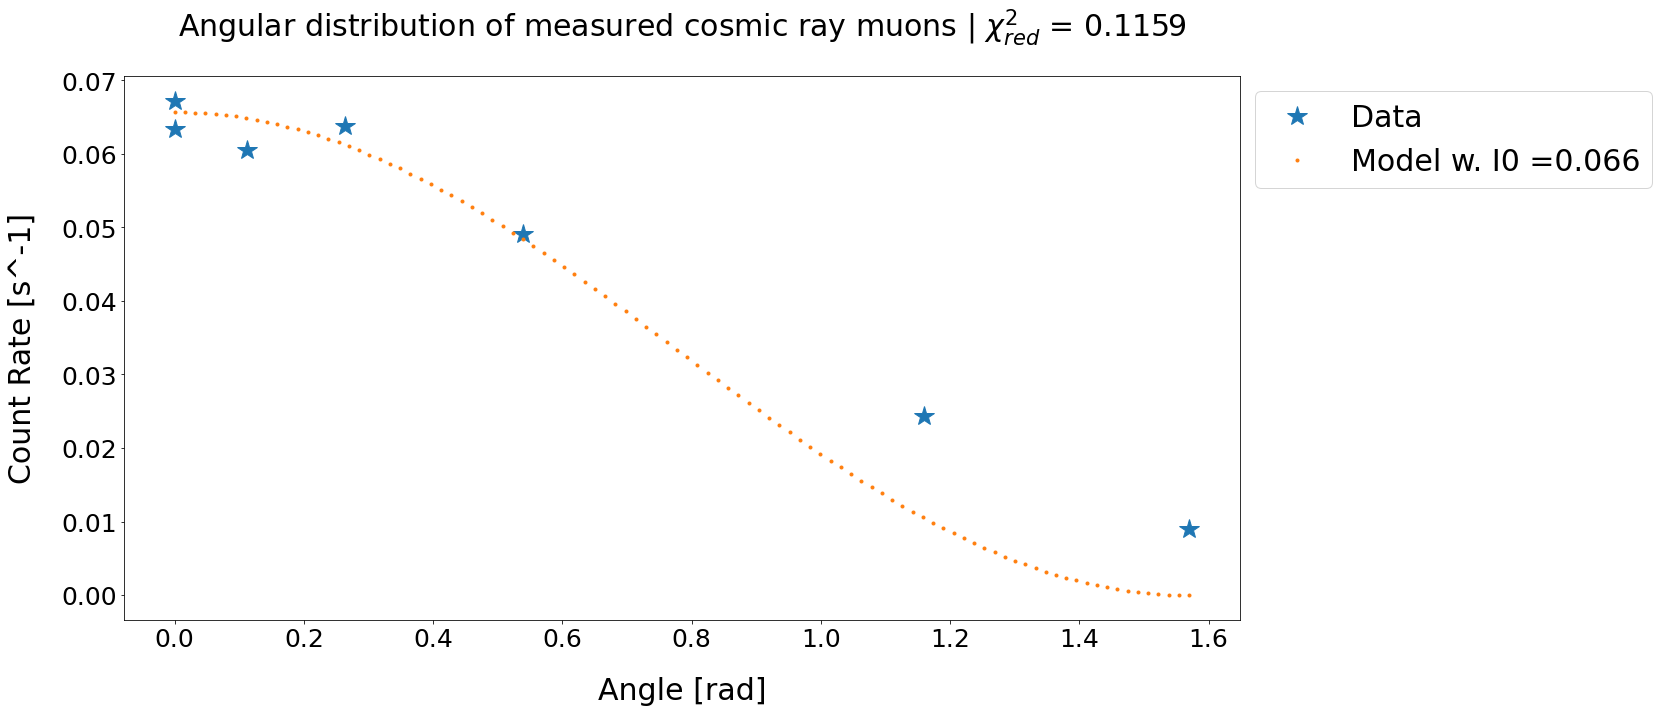

In [9]:
fig, ax = plt.subplots(1,1,figsize=(20,10))

fsize = 30

ax.yaxis.get_offset_text().set_fontsize(fsize)
ax.xaxis.get_offset_text().set_fontsize(fsize)

#plt.plot(time_h, strain_h, label = 'Hanford')
plt.plot(dat_angels, dat_counts,'*', ms = 20, label = 'Data')
plt.plot(rads, n_flux(rads, *popt),'.', label = 'Model w. I0 =' + str(np.round(*popt,3)))

plt.ylabel('Count Rate [s^-1]', fontsize = fsize, labelpad = 25)
plt.xlabel('Angle [rad]', fontsize = fsize,  labelpad = 25)
plt.xticks(size = fsize-5)
plt.yticks(size = fsize-5)
plt.title('Angular distribution of measured cosmic ray muons | $\chi^2_{red}$ = ' + str(np.round(chi_red,5)), pad = 40, fontsize = fsize)

plt.legend(fontsize = fsize, bbox_to_anchor=(1,1),loc = 'upper left')
plt.savefig('fig.png', bbox_inches = "tight")